In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###### EXPLORING DATA

In [3]:
data=pd.read_csv("ElectricCarData_Clean.csv")

In [4]:
column_names = data.columns.tolist()
print(column_names)

['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro']


In [5]:
num_rows, num_cols = data.shape
print(num_rows, num_cols)

103 14


In [6]:
first_three_rows = data.head(3)
print(first_three_rows)

         Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                       ID.3 Pure      10.0           160   
2    Polestar                               2       4.7           210   

   Range_Km  Efficiency_WhKm FastCharge_KmH RapidCharge PowerTrain  \
0       450              161            940         Yes        AWD   
1       270              167            250         Yes        RWD   
2       400              181            620         Yes        AWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro  
0  Type 2 CCS      Sedan       D      5      55480  
1  Type 2 CCS  Hatchback       C      5      30000  
2  Type 2 CCS   Liftback       D      5      56440  


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


###### SEGMENT EXTRACTION

In [8]:
ilocfunc = data.iloc[:,0:9]
ilocfunc

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD
2,Polestar,2,4.7,210,400,181,620,Yes,AWD
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD
4,Honda,e,9.5,145,170,168,190,Yes,RWD
...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
df = pd.DataFrame(data)

In [12]:
df = pd.get_dummies(df, columns=['Brand', 'Model', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'RapidCharge'])

In [14]:
features_to_scale = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH']

###### SEGMENT EXTRACTION

In [16]:
scaler = StandardScaler()

In [21]:
numeric_features = df.select_dtypes(include=[float, int])

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(numeric_features)

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
df['Cluster'] = clusters

In [26]:
print(df['Cluster'].value_counts())

Cluster
0    68
2    29
1     6
Name: count, dtype: int64


###### PROFILING AND DESCRIBING POTENTIAL SEGMENTS

In [31]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
non_numeric_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in non_numeric_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
df_encoded.fillna(df_encoded.mean(), inplace=True) 
print(df_encoded.dtypes)
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)

df['Segment'] = kmeans.fit_predict(df_encoded)
print(df.head())

AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH       int32
                    ...   
Segment_N             bool
Segment_S             bool
RapidCharge_No        bool
RapidCharge_Yes       bool
Cluster              int32
Length: 169, dtype: object


C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm FastCharge_KmH  Seats  \
0       4.6           233       450              161            940      5   
1      10.0           160       270              167            250      5   
2       4.7           210       400              181            620      5   
3       6.8           180       360              206            560      5   
4       9.5           145       170              168            190      4   

   PriceEuro  Brand_Aiways   Brand_Audi   Brand_BMW   ...  Segment_C  \
0      55480          False        False       False  ...      False   
1      30000          False        False       False  ...       True   
2      56440          False        False       False  ...      False   
3      68040          False        False        True  ...      False   
4      32997          False        False       False  ...      False   

   Segment_D  Segment_E  Segment_F  Segment_N  Segment_S  RapidCharge_No  \
0       True      Fals

###### SELECTION OF TARGET SEGMENT

In [32]:
target_segment = 0
target_segment_df = df[df['Segment'] == target_segment]

In [33]:
target_segment_profile = target_segment_df.describe()
print(target_segment_profile)

        AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm      Seats  \
count  58.000000     58.000000   58.000000        58.000000  58.000000   
mean    9.124138    153.344828  274.741379       174.034483   4.706897   
std     2.601707     17.569463   88.488390        15.608101   0.749470   
min     5.000000    123.000000   95.000000       153.000000   2.000000   
25%     7.500000    144.250000  220.000000       166.000000   4.000000   
50%     8.750000    150.000000  255.000000       171.000000   5.000000   
75%     9.875000    160.000000  340.000000       180.000000   5.000000   
max    22.400000    225.000000  440.000000       256.000000   7.000000   

          PriceEuro  Cluster  Segment  
count     58.000000     58.0     58.0  
mean   35120.706897      0.0      0.0  
std     6915.261048      0.0      0.0  
min    20129.000000      0.0      0.0  
25%    31308.250000      0.0      0.0  
50%    35000.000000      0.0      0.0  
75%    39746.750000      0.0      0.0  
max    47500.

###### VISUALISATION

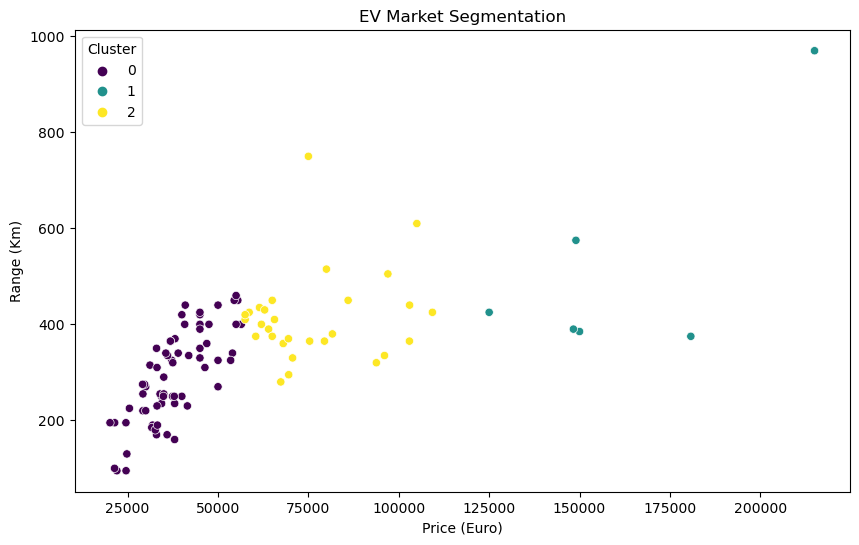

In [27]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PriceEuro', y='Range_Km', hue='Cluster', palette='viridis')
plt.title('EV Market Segmentation')
plt.xlabel('Price (Euro)')
plt.ylabel('Range (Km)')
plt.show()

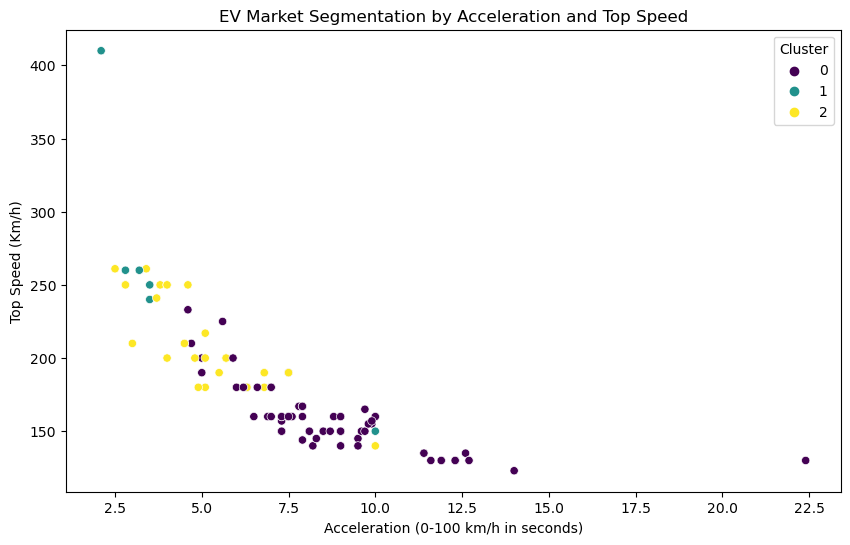

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AccelSec', y='TopSpeed_KmH', hue='Cluster', palette='viridis')
plt.title('EV Market Segmentation by Acceleration and Top Speed')
plt.xlabel('Acceleration (0-100 km/h in seconds)')
plt.ylabel('Top Speed (Km/h)')
plt.legend(title='Cluster')
plt.show()

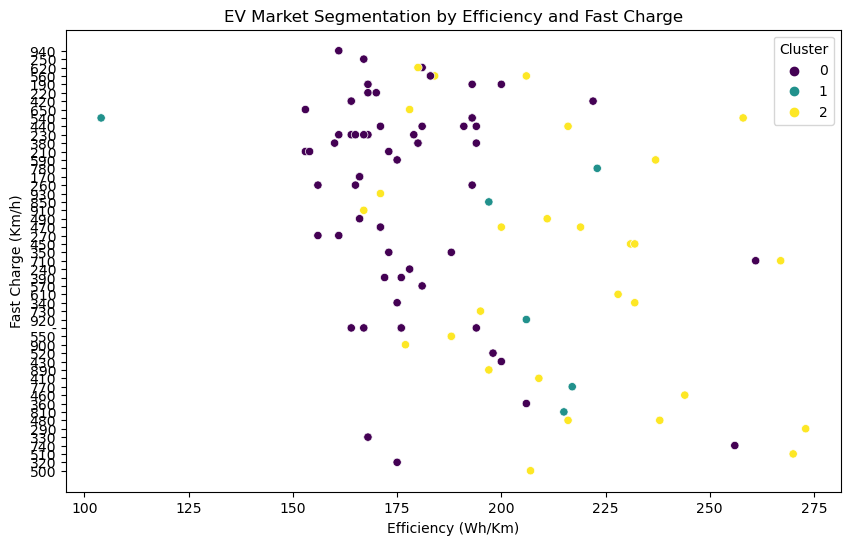

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Efficiency_WhKm', y='FastCharge_KmH', hue='Cluster', palette='viridis')
plt.title('EV Market Segmentation by Efficiency and Fast Charge')
plt.xlabel('Efficiency (Wh/Km)')
plt.ylabel('Fast Charge (Km/h)')
plt.legend(title='Cluster')
plt.show()